# House Prices: Advanced Regression Techniques

### Training Goal
* With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this challenges predict the final price of each home.
* 아이오와 주 에임스 시에 있는 주거용 주택의 (거의 모든) 측면을 설명하는 79 가지 설명 변수로 각 주택의 최종 가격을 예측한다.

### 성능 측정 지표
* #### RMSE (Root Mean Squared Error)
$$ \text{RMSE} = \sqrt{\frac{1}{|\hat{R}|} \sum_{\hat{r}_{ui} \in \hat{R}}(r_{ui} - \hat{r}_{ui})^2} $$

### Data
* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

## Data Load

In [384]:
import csv
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.graphics import utils
from sklearn.model_selection import KFold
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import Imputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib
from joblib import dump, load
from collections import defaultdict
import scipy as sp
from sklearn.linear_model import Lasso

sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()
%matplotlib inline

pd.options.display.max_columns = 400
pd.options.display.max_rows = 200
pd.options.display.max_colwidth = 600
pd.options.display.precision = 10

In [385]:
dfX = pd.read_csv('./data/train.csv', index_col='Id')
df_test = pd.read_csv('./data/test.csv', index_col='Id')

In [386]:
for df in [dfX, df_test]:
    for i in df.index:
        if df['MSZoning'][i] == 'C (all)':
            df['MSZoning'][i] = 'C'

C:\Users\JI SEONG MIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [387]:
dfX.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


* 종속 변수인 SalePrice 의 분포가 편향되어 있어 log 변환

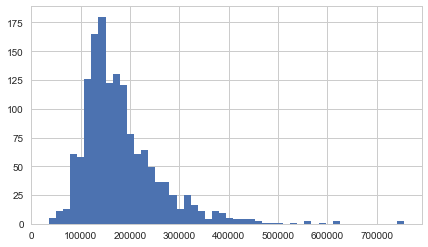

In [388]:
dfX['SalePrice'].hist(bins=50, figsize=(7,4))
plt.show()

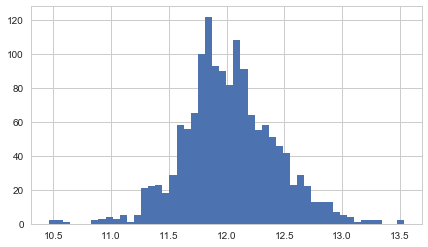

In [389]:
np.log(dfX['SalePrice']).hist(bins=50, figsize=(7,4))
plt.show()

In [390]:
sale_price = dfX.pop('SalePrice')
sale_price_log = np.log(sale_price)

In [391]:
dfX.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


# EDA

* numeric feature 중 outlier 가 확인되는 feature 의 scatter plot 확인
  - feature selection 후 outlier 제거

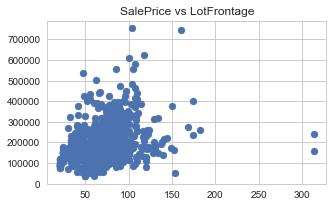

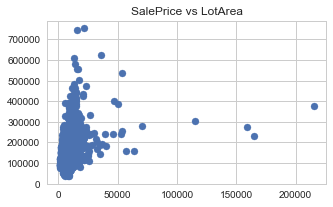

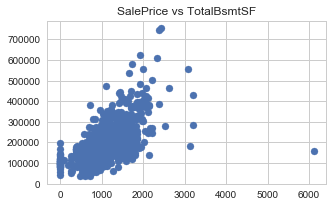

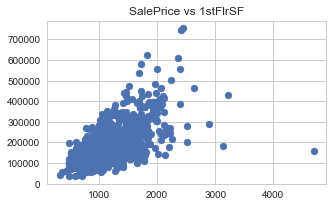

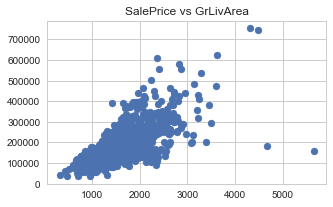

In [392]:
for cat in ['LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea']:
    plt.figure(figsize=(5,3))
    plt.scatter(x=dfX[cat], y=sale_price)
    plt.title("SalePrice vs " + cat)
    plt.show()

In [393]:
pd.concat([dfX[['LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea']], sale_price], axis=1).corr().SalePrice

LotFrontage    0.3517990966
LotArea        0.2638433539
TotalBsmtSF    0.6135805516
1stFlrSF       0.6058521847
GrLivArea      0.7086244776
SalePrice      1.0000000000
Name: SalePrice, dtype: float64

* feature 생성
  - 지하실 총 면적과 지상 총 면적을 구성하는 feature 확인
  - 지하실 총 면적과 지상 총 면적을 더한 총 면적 feature 생성

In [394]:
(dfX['TotalBsmtSF'] == dfX['BsmtFinSF1'] + dfX['BsmtFinSF2'] + dfX['BsmtUnfSF']).value_counts()

True    1460
dtype: int64

In [395]:
(dfX['GrLivArea'] == dfX['1stFlrSF'] + dfX['2ndFlrSF'] + dfX['LowQualFinSF'] ).value_counts()

True    1460
dtype: int64

In [396]:
dfX['TotalArea'] = dfX['TotalBsmtSF'].fillna(0) + dfX['GrLivArea'].fillna(0)

In [397]:
dfX['TotalArea'].head()

Id
1    2566
2    2524
3    2706
4    2473
5    3343
Name: TotalArea, dtype: int64

### column 의 속성에 따라 분류
  - numeric feature
  - categorical feature (ordinal)
  - categorical feature (rest)

In [398]:
# int64 or float64 의 type 이지만 이산적인 분포로 categorical 한 성격을 가지고 있는 feature
not_num = ['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold']

num_cols = [num for num in dfX.keys() if (dfX[num].dtype == 'int64' or dfX[num].dtype == 'float64') and (num not in not_num)]
cat_cols = [cat for cat in dfX.keys() if cat not in num_cols]

In [399]:
numcat_data = {
'LandSlope' : ['Sev', 'Mod', 'Gtl'],
'ExterQual' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
'ExterCond' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
'BsmtQual' : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
'BsmtCond' : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
'BsmtExposure' : ['NA', 'No', 'Mn', 'Av', 'Gd'],
'BsmtFinType1' : ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
'BsmtFinType2' : ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
'HeatingQC' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
'KitchenQual' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
'Functional' : ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
'FireplaceQu' : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
'GarageFinish' : ['NA', 'Unf', 'RFn', 'Fin'],
'GarageQual' : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
'GarageCond' : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
'PoolQC' : ['NA', 'Fa', 'TA', 'Gd', 'Ex'],
'OverallQual' : list(range(1, 11)), 
'OverallCond' : list(range(1, 11)),
}

numcat_cols = list(numcat_data.keys())
dum_cols = [cat for cat in cat_cols if cat not in numcat_cols]

In [400]:
dfX[list(numcat_data.keys())].isnull().sum().sort_values(ascending=False).head(12)

PoolQC          1453
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
OverallCond        0
ExterQual          0
dtype: int64

In [401]:
print(len(dfX.columns))
print(len(num_cols))
print(len(numcat_cols))
print(len(cat_cols))
print(len(num_cols) + len(numcat_cols) + len(dum_cols))

80
33
18
47
80


### Numeric Feature

* ### replace missing value (feature 의 속성에 따라)
  - replace 0 (data description 에 feature 속성이 존재하지 않을 수 있다는 것이 명시되어 있을 경우)
  - replace median

* missing value 여부를 나타내는 column 생성 (False / True)

In [402]:
zero = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 
        'GarageCars', 'GarageArea', 'PoolArea', 'MiscVal', 'GarageYrBlt', 'MasVnrArea']
med = [num for num in num_cols if num not in zero]

In [403]:
for num in med:
    dfX['{0}_na'.format(num)] = dfX[num].isnull()
    dfX[num] = dfX[num].fillna(dfX[num].median())

In [404]:
for num in zero:
    dfX['{0}_na'.format(num)] = dfX[num].isnull()
    dfX[num] = dfX[num].fillna(0)

In [405]:
dfX[num_cols].isnull().sum().sort_values(ascending=False).head()

TotalArea       0
FullBath        0
LotArea         0
YearBuilt       0
YearRemodAdd    0
dtype: int64

* 상관계수 확인

In [406]:
corr_num = pd.concat([dfX[num_cols], sale_price_log], axis=1).corr()

In [407]:
corr_num['SalePrice'].sort_values(ascending=False)

SalePrice        1.0000000000
TotalArea        0.7732768410
GrLivArea        0.7009266525
GarageCars       0.6806248074
GarageArea       0.6508875559
TotalBsmtSF      0.6121339754
1stFlrSF         0.5969810450
FullBath         0.5947705420
YearBuilt        0.5865702404
YearRemodAdd     0.5656078326
TotRmsAbvGrd     0.5344222037
Fireplaces       0.4894494276
MasVnrArea       0.4267751318
BsmtFinSF1       0.3720230736
GarageYrBlt      0.3490136170
LotFrontage      0.3352915024
WoodDeckSF       0.3341350740
OpenPorchSF      0.3210529720
2ndFlrSF         0.3192999843
HalfBath         0.3139822499
LotArea          0.2573198924
BsmtFullBath     0.2362241088
BsmtUnfSF        0.2219850535
BedroomAbvGr     0.2090436821
ScreenPorch      0.1212076049
PoolArea         0.0697978060
3SsnPorch        0.0549002265
BsmtFinSF2       0.0048324105
BsmtHalfBath    -0.0051490941
MiscVal         -0.0200208202
YrSold          -0.0372629695
LowQualFinSF    -0.0379628031
KitchenAbvGr    -0.1475480885
EnclosedPo

* 상관계수의 절댓값이 0.1 이하인 feature 확인

In [408]:
under_cols = [i for i in corr_num if abs(corr_num.SalePrice[i]) < 0.1]
for i in under_cols:
    print(i, ':', corr_num.SalePrice[i])

BsmtFinSF2 : 0.0048324105320466755
LowQualFinSF : -0.03796280313742792
BsmtHalfBath : -0.005149094053239845
3SsnPorch : 0.05490022646761992
PoolArea : 0.06979780600969131
MiscVal : -0.020020820155023815
YrSold : -0.03726296946313519


* BsmtFinSF2 : 2 유형의 평방 피트
* LowQualFinSF : 낮은 품질로 완성된 평방 피트 (모든 층)
* BsmtHalfBath : 지하실 절반 욕실
* 3SsnPorch : Three season porch 의 평방 피트
* PoolArea : 수영장의 평방 피트
* MiscVal : 기타 기능의 달러 가치

* 다중공선성 확인
  - 상관계수 dataframe 입력 시 다중공선성을 나타내는 feature 들과 상관계수 출력

In [409]:
def check_collinearity(df_corr):
    dupl = []
    drop_cols = []
    for i in df_corr:
        for j in range(len(df_corr[i])):
            if df_corr[i][j] > 0.9 and df_corr[i][j] < 1 and i not in dupl:
                dupl.append(i)
                dupl.append(df_corr[i][[j]].index[0])
                print(i, '/', df_corr[i][[j]].index[0], ':', df_corr[i][j])
                print(i, ':', df_corr['SalePrice'][i])
                print(df_corr[i][[j]].index[0], ':', df_corr['SalePrice'][df_corr[i][[j]].index[0]])
                print('= '* 30 )
                if df_corr['SalePrice'][i] < df_corr['SalePrice'][df_corr[i][[j]].index[0]]:
                    drop_cols.append(i)
                else:
                    drop_cols.append(df_corr[i][[j]].index[0])
                    
    print(drop_cols)

In [410]:
check_collinearity(corr_num)

[]


In [411]:
drop_cols = under_cols + [f'{i}_na' for i in under_cols]

In [412]:
dfX.drop(drop_cols, axis=1, inplace=True)

### Categorical Feature (Ordinal)

* feature의 처리 과정을 편리하게 하기 위해 type 변경 (category type)

In [413]:
for cat_list in [cat_cols, numcat_cols]:
    for cat in cat_list:
        dfX[cat] = dfX[cat].astype('category').cat.as_ordered()

* 정해진 범주에 벗어나는 값이 있는 지 확인

In [414]:
numcat_data

{'BsmtCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtExposure': ['NA', 'No', 'Mn', 'Av', 'Gd'],
 'BsmtFinType1': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 'BsmtFinType2': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 'BsmtQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'FireplaceQu': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
 'GarageCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'GarageFinish': ['NA', 'Unf', 'RFn', 'Fin'],
 'GarageQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'LandSlope': ['Sev', 'Mod', 'Gtl'],
 'OverallCond': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'OverallQual': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'PoolQC': ['NA', 'Fa', 'TA', 'Gd', 'Ex']}

In [415]:
[val for cat in list(numcat_data.keys()) for val in list(dfX[cat].unique()) if val not in numcat_data[cat]]

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

* value 의 범주와 순서 설정

In [416]:
for cat in numcat_data.keys():
    dfX[cat].cat.set_categories(numcat_data[cat], ordered=True, inplace=True)

* 일부 feature 의 missing value 대체

In [417]:
for i in numcat_cols:
    if 'NA' in numcat_data[i]:
        dfX[i].fillna('NA')
    elif 'None' in numcat_data[i]:
        dfX[i].filna('None')

* 설정한 범주와 순서에 맞게 numeric value 대체

In [418]:
for col in numcat_cols:
    dfX[col] = dfX[col].cat.codes + 1 # NaN 값을 0 으로 만들기 위해 +!

* 상관계수 확인 및 columns 제거

In [419]:
corr_numcat = pd.concat([dfX[numcat_cols], sale_price_log], axis=1).corr()

In [420]:
corr_numcat.SalePrice.sort_values(ascending=False)

SalePrice       1.0000000000
OverallQual     0.8171844179
ExterQual       0.6788398349
KitchenQual     0.6678930256
GarageFinish    0.6020669076
BsmtQual        0.5799205518
FireplaceQu     0.5427058562
HeatingQC       0.4737616627
BsmtExposure    0.3691411538
GarageQual      0.3573474917
GarageCond      0.3520990128
BsmtFinType1    0.3419101196
BsmtCond        0.2645308932
Functional      0.1362937956
PoolQC          0.0772914921
ExterCond       0.0493136322
BsmtFinType2    0.0456620579
OverallCond    -0.0368679877
LandSlope      -0.0385260060
Name: SalePrice, dtype: float64

* 상관계수의 절댓값이 0.1 이하인 feature 확인

In [421]:
under_cols_numcat = [i for i in corr_numcat if abs(corr_numcat.SalePrice[i]) < 0.1]
for i in under_cols_numcat:
    print(i, ':', corr_numcat.SalePrice[i])

LandSlope : -0.03852600598235168
ExterCond : 0.04931363215047721
BsmtFinType2 : 0.045662057894016256
PoolQC : 0.0772914921383458
OverallCond : -0.03686798773028383


* LandSlope : 주택의 경사
* ExterCond : 외부 재료의 현재 상태를 평가
* BsmtFinType2 : 지하실 완공 지역의 평가 (여러 유형의 경우)
* PoolQC : 수영장 품질
* OverallCond : 주택의 전반적인 상태 평가

* 다중공선성 확인

In [422]:
check_collinearity(corr_numcat)

GarageQual / GarageCond : 0.9759871168271108
GarageQual : 0.35734749167928415
GarageCond : 0.3520990128358248
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
['GarageCond']


In [423]:
drop_cols_numcat = under_cols_numcat + ['GarageCond']

In [424]:
dfX.drop(drop_cols_numcat, axis=1, inplace=True)

* ### one-hot-encoding

* Utilities feature 의 대부분의 class 하나이기 때문에 제외

In [425]:
for df in [dfX, df_test]:
    print(df['Utilities'].value_counts())
    print('='*30)

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
AllPub    1457
Name: Utilities, dtype: int64


In [426]:
dfX.drop('Utilities', axis=1, inplace=True)
dum_cols.remove('Utilities')

* check & replace missing value
  - 'NA' 혹은 'None' class 가 있는 경우 해당 값으로 대체, 없는 경우 최빈값으로 대체

In [427]:
cat_classes = {
'MSSubClass': [20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160, 180, 190],
'LotShape' : ['Reg', 'IR1', 'IR2', 'IR3'],
'LandContour' : ['Lvl', 'Bnk', 'HLS', 'Low'],
# 'Utilities' : ['AllPub', 'NoSewr', 'NoSeWa', 'ELO'],
'CentralAir': ['N', 'Y'],
'Electrical' : ['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'],
'MoSold' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
'MSZoning' : ['A', 'C', 'FV', 'I', 'RH', 'RL', 'RP', 'RM'],
'Street' : ['Grvl', 'Pave'],
'Alley' : ['Grvl', 'Pave', 'NA'],
'LotConfig' : ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'],
'Neighborhood' : ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NoRidge', 'NPkVill', 'NridgHt', 'NWAmes', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'],
'Condition1' : ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'],
'Condition2' : ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'],
'BldgType' : ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'],
'HouseStyle' : ['1Story', '1.5Fin', '1.5Unf', '2Story', '2.5Fin', '2.5Unf', 'SFoyer', 'SLvl'],
'RoofStyle' : ['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed'],
'RoofMatl' : ['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdShake', 'WdShngl'],
'Exterior1st' : ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing'],
'Exterior2nd' : ['AsbShng', 'AsphShn', 'Brk Cmn', 'BrkFace', 'CBlock', 'CmentBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'Wd Shng'],
'MasVnrType' : ['BrkCmn', 'BrkFace', 'CBlock', 'None', 'Stone'],
'Foundation' : ['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'],
'Heating' : ['Floor', 'GasA', 'GasW', 'Grav', 'OthW', 'Wall'],
'GarageType' : ['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'NA'],
'PavedDrive' : ['Y', 'P', 'N'],
'Fence' : ['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'NA'],
'MiscFeature' : ['Elev', 'Gar2', 'Othr', 'Shed', 'TenC', 'NA'],
'SaleType' : ['WD', 'CWD', 'VWD', 'New', 'COD', 'Con', 'ConLw', 'ConLI', 'ConLD', 'Oth'],
'SaleCondition' : ['Normal', 'Abnorml', 'AdjLand', 'Alloca', 'Family', 'Partial']}

In [428]:
dfX[dum_cols].isnull().sum().sort_values(ascending=False).head(7)

MiscFeature      1406
Alley            1369
Fence            1179
GarageType         81
MasVnrType          8
Electrical          1
SaleCondition       0
dtype: int64

In [429]:
for i in dum_cols:
    dfX[i].cat.set_categories(cat_classes[i], ordered=True, inplace=True)
    
for i in dum_cols:
    if 'NA' in cat_classes[i]:
        dfX[i] = dfX[i].fillna('NA')
    elif 'None'in cat_classes[i]:
        dfX[i] = dfX[i].fillna('None')
    else:
        dfX[i] = dfX[i].fillna(dfX[i].mode()[0])

In [430]:
dfX[dum_cols].isnull().sum().sort_values(ascending=False).head()

SaleCondition    0
SaleType         0
MSZoning         0
Street           0
Alley            0
dtype: int64

* 분산분석을 통한 categorical feature의 영향력 분석

In [431]:
for cat in dum_cols:
    dfX[cat] = dfX[cat].astype('object')

In [432]:
anova_cat = pd.concat([dfX[dum_cols], sale_price], axis=1)

In [433]:
cats_rs = pd.DataFrame(data=[sm.OLS.from_formula("SalePrice ~ C(" + cat + ")" , anova_cat).fit().rsquared for cat in dum_cols],
             index=list(dum_cols), columns=['r_squared'])
cats_rs['r_squared'].sort_values(ascending=False)

Neighborhood     0.5455749908
Foundation       0.2563684015
GarageType       0.2492042305
MSSubClass       0.2463159728
MasVnrType       0.1832768823
Exterior2nd      0.1538298601
Exterior1st      0.1527731231
SaleType         0.1372874870
SaleCondition    0.1354974769
MSZoning         0.1075596834
HouseStyle       0.0863126273
LotShape         0.0763757075
CentralAir       0.0631658459
Electrical       0.0596509318
RoofStyle        0.0576966301
PavedDrive       0.0545397283
Fence            0.0356147168
BldgType         0.0345340269
Condition1       0.0326306400
RoofMatl         0.0314131230
LandContour      0.0257940855
LotConfig        0.0210193645
Alley            0.0204075449
Heating          0.0144371354
Condition2       0.0098991607
MoSold           0.0072240344
MiscFeature      0.0070797529
Street           0.0016839152
Name: r_squared, dtype: float64

In [434]:
cats_rs[cats_rs.r_squared < 0.1].index

Index(['Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Heating', 'CentralAir', 'Electrical', 'PavedDrive', 'Fence',
       'MiscFeature', 'MoSold'],
      dtype='object')

 * 'Street' : 주택 접근을 위한 도록의 유형
 * 'LotShape' : 주택의 일반적인 형태
 * 'LandContour' : 주택의 편평도
 * 'LotConfig' : 택지 구성
 * 'Condition1' : 다양한 조건에 대한 접근성
 * 'Condition2' : 다양한 조건에 대한 접근성 (둘 이상이 있는 경우)
 * 'BldgType' : 주거 유형
 * 'HouseStyle' : 주거 스타일
 * 'RoofStyle' : 지붕 유형
 * 'RoofMatl' : 지붕 재료
 * 'Heating' : 난방 유형
 * 'CentralAir' : 중앙 냉방
 * 'Electrical' : 전기 시스템
 * 'PavedDrive' : 포장 도로
 * 'Fence' : 울타리 품질
 * 'MoSold' : 판매 월

In [435]:
dfX = dfX.drop(cats_rs[cats_rs.r_squared < 0.1].index, axis=1)

In [436]:
for i in cats_rs[cats_rs.r_squared < 0.1].index:
    dum_cols.remove(i)

* pandas의 get_dummies 를 사용하여 one-hot-encoding
  - 위의 단계에서 set_categories를 통해 value의 범주를 지정하였므로 누락 값에 대한 column 또한 생성

In [437]:
for cat in dum_cols:
    dfX[cat] = dfX[cat].astype('category').cat.as_ordered()

dummies = pd.get_dummies(dfX[dum_cols])

dfX.drop(dum_cols, axis=1, inplace=True)
dfX = pd.concat([dfX, dummies], axis=1)

In [438]:
dfX.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,TotalArea,LotFrontage_na,LotArea_na,YearBuilt_na,YearRemodAdd_na,1stFlrSF_na,2ndFlrSF_na,GrLivArea_na,FullBath_na,HalfBath_na,BedroomAbvGr_na,KitchenAbvGr_na,TotRmsAbvGrd_na,WoodDeckSF_na,OpenPorchSF_na,EnclosedPorch_na,ScreenPorch_na,TotalArea_na,BsmtFinSF1_na,BsmtUnfSF_na,TotalBsmtSF_na,BsmtFullBath_na,Fireplaces_na,GarageCars_na,GarageArea_na,GarageYrBlt_na,MasVnrArea_na,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,2003,2003,196.0,4,5,4,2,7,706,150,856,5,856,854,1710,1,2,1,3,1,4,8,8,0,0,2003.0,3,2,548,4,0,61,0,0,2566,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,1976,1976,0.0,3,5,4,5,6,978,284,1262,5,1262,0,1262,0,2,0,3,1,3,6,8,1,4,1976.0,3,2,460,4,298,0,0,0,2524,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,2001,2002,162.0,4,5,4,3,7,486,434,920,5,920,866,1786,1,2,1,3,1,4,6,8,1,4,2001.0,3,2,608,4,0,

* ## Outlier 제거

In [439]:
train_cor = pd.concat([dfX, sale_price], axis=1).corr()

In [440]:
train_cor.SalePrice.sort_values(ascending=False)

SalePrice                1.0000000000
OverallQual              0.7909816006
TotalArea                0.7789588290
GrLivArea                0.7086244776
ExterQual                0.6826392417
KitchenQual              0.6595997207
GarageCars               0.6404091973
GarageArea               0.6234314389
TotalBsmtSF              0.6135805516
1stFlrSF                 0.6058521847
FullBath                 0.5606637627
BsmtQual                 0.5452185413
GarageFinish             0.5340171040
TotRmsAbvGrd             0.5337231556
YearBuilt                0.5228973329
FireplaceQu              0.5139229936
YearRemodAdd             0.5071009671
Foundation_PConc         0.4977337526
MasVnrArea               0.4726144990
Fireplaces               0.4669288368
HeatingQC                0.4276487074
Neighborhood_NridgHt     0.4021485982
BsmtFinSF1               0.3864198062
BsmtExposure             0.3791850023
MSSubClass_60            0.3771970684
SaleType_New             0.3575094051
SaleConditio

In [441]:
train_cor[train_cor.SalePrice.sort_values(ascending=False) > 0.5].index

C:\Users\JI SEONG MIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual',
       'TotRmsAbvGrd', 'FireplaceQu', 'GarageFinish', 'GarageCars',
       'GarageArea', 'TotalArea', 'SalePrice'],
      dtype='object')

* 상관계수가 0.5 이상인 feature 중 outlier 를 확인하기 쉬운 feature 의 plot

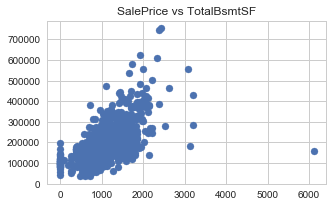

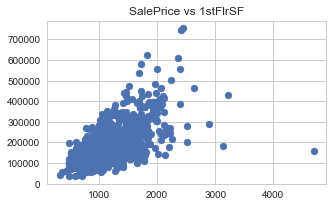

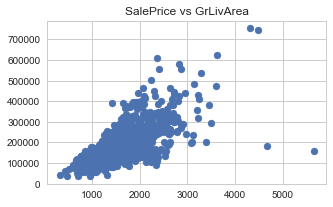

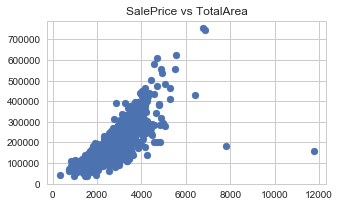

In [442]:
for cat in ['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'TotalArea']:
    plt.figure(figsize=(5,3))
    plt.scatter(x=dfX[cat], y=sale_price)
    plt.title("SalePrice vs " + cat)
    plt.show()

In [443]:
print('TotalBsmtSF :', list(dfX[dfX.TotalBsmtSF > 5000].index))
print('1stFlrSF :', list(dfX[dfX['1stFlrSF'] > 4000].index))
print('GrLivArea :', list(dfX[dfX.GrLivArea > 4000].index & sale_price[sale_price < 600000].index))
print('TotalArea :', list(dfX[dfX.TotalArea > 7000].index ))

TotalBsmtSF : [1299]
1stFlrSF : [1299]
GrLivArea : [524, 1299]
TotalArea : [524, 1299]


# 함수 생성 및 train / test 적용

In [460]:
dfX = pd.read_csv('./data/train.csv', index_col='Id')
df_test = pd.read_csv('./data/test.csv', index_col='Id')

In [461]:
def cleansing_data(train, test):
    
    #outlier 제거
    train = train.drop([524, 1299])
    
    for df in [train, test]:
        for i in df.index:
            if df['MSZoning'][i] == 'C (all)':
                df['MSZoning'][i] = 'C'        

    # 종속변수와 종속변수의 왜도로 인해 log를 취한 종속변수 정의
    sale_price = train.pop('SalePrice')
    sale_price_log = np.log(sale_price)
    
    # 전체 면적을 나타내는 새로운 변수 생성
    for df in [train, test]:
        df['TotalArea'] = df['TotalBsmtSF'].fillna(0) + df['GrLivArea'].fillna(0)

    # 변수의 속성에 따라 구분
    not_num = ['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold']

    num_cols = [num for num in train.keys() if (train[num].dtype == 'int64' or train[num].dtype == 'float64') 
                and (num not in not_num)]
    cat_cols = [cat for cat in train.keys() if cat not in num_cols]

    numcat_data = {
        'LandSlope' : ['Sev', 'Mod', 'Gtl'],
        'ExterQual' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
        'ExterCond' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
        'BsmtQual' : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
        'BsmtCond' : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
        'BsmtExposure' : ['NA', 'No', 'Mn', 'Av', 'Gd'],
        'BsmtFinType1' : ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
        'BsmtFinType2' : ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
        'HeatingQC' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
        'KitchenQual' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
        'Functional' : ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
        'FireplaceQu' : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
        'GarageFinish' : ['NA', 'Unf', 'RFn', 'Fin'],
        'GarageQual' : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
        'GarageCond' : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
        'PoolQC' : ['NA', 'Fa', 'TA', 'Gd', 'Ex'],
        'OverallQual' : list(range(1, 11)), 
        'OverallCond' : list(range(1, 11)),
        }

    numcat_cols = list(numcat_data.keys())
    dum_cols = [cat for cat in cat_cols if cat not in numcat_cols]
    
    ## NUMERIC FEATURE
    # numeric feature 의 missing value replace 및 missing value 여부를 나타내는 column 생성 (False / True)
    zero = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 
        'GarageCars', 'GarageArea', 'PoolArea', 'MiscVal', 'GarageYrBlt', 'MasVnrArea']
    med = [num for num in num_cols if num not in zero]
    
    for df in [train, test]:
        for num in med:
            df['{0}_na'.format(num)] = df[num].isnull()
            df[num] = df[num].fillna(df[num].median())

    for df in [train, test]:
        for num in zero:
            df['{0}_na'.format(num)] = df[num].isnull()
            df[num] = df[num].fillna(0)
            
    # train data 기준으로 상관계수가 0.1 미만인 columns 삭제
    corr_num = pd.concat([train[num_cols], sale_price_log], axis=1).corr()
    under_cols = [i for i in corr_num if abs(corr_num.SalePrice[i]) < 0.1]
    drop_cols = under_cols + [f'{i}_na' for i in under_cols]
    for df in [train, test]:
        df.drop(drop_cols, axis=1, inplace=True)
        
        
    ## ORDINAL FEATURE
    # feature의 처리 과정을 편리하기 위해 type 변경 (category type)
    for df in [train, test]:
        for cat_list in [cat_cols, numcat_cols]:
            for cat in cat_list:
                df[cat] = df[cat].astype('category').cat.as_ordered()
    
    # value 의 범주와 순서 설정
    for df in [train, test]:
        for cat in numcat_data.keys():
            df[cat].cat.set_categories(numcat_data[cat], ordered=True, inplace=True)
    
    # 일부 feature 의 missing value 대체
    for df in [train, test]:
        for i in numcat_cols:
            if 'NA' in numcat_data[i]:
                df[i].fillna('NA')
            elif 'None' in numcat_data[i]:
                df[i].filna('None')

    # 설정한 범주와 순서에 맞게 numeric value 대체
    for df in [train, test]:
        for col in numcat_cols:
            df[col] = df[col].cat.codes + 1 # NaN 값을 0 으로 만들기 위해 +!
            
    # train data 기준으로 상관계수가 0.1 미만인 columns 삭제
    corr_numcat = pd.concat([train[numcat_cols], sale_price_log], axis=1).corr()
    under_cols_numcat = [i for i in corr_numcat if abs(corr_numcat.SalePrice[i]) < 0.1]
    drop_cols_numcat = under_cols_numcat + ['GarageCond']
    for df in [train, test]:
        df.drop(drop_cols_numcat, axis=1, inplace=True)        
            
    ## CATEGORICAL FEATURE (one-hot)       
    # Utilities feature 의 대부분의 class 하나이기 때문에 제외
    for df in [train, test]:
        df.drop('Utilities', axis=1, inplace=True)
    dum_cols.remove('Utilities')
    
    # categorical feature의 범주 정
    cat_classes = {
        'MSSubClass': [20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160, 180, 190],
        'LotShape' : ['Reg', 'IR1', 'IR2', 'IR3'],
        'LandContour' : ['Lvl', 'Bnk', 'HLS', 'Low'],
        # 'Utilities' : ['AllPub', 'NoSewr', 'NoSeWa', 'ELO'],
        'CentralAir': ['N', 'Y'],
        'Electrical' : ['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'],
        'MoSold' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
        'MSZoning' : ['A', 'C', 'FV', 'I', 'RH', 'RL', 'RP', 'RM'],
        'Street' : ['Grvl', 'Pave'],
        'Alley' : ['Grvl', 'Pave', 'NA'],
        'LotConfig' : ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'],
        'Neighborhood' : ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NoRidge', 'NPkVill', 'NridgHt', 'NWAmes', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'],
        'Condition1' : ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'],
        'Condition2' : ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'],
        'BldgType' : ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'],
        'HouseStyle' : ['1Story', '1.5Fin', '1.5Unf', '2Story', '2.5Fin', '2.5Unf', 'SFoyer', 'SLvl'],
        'RoofStyle' : ['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed'],
        'RoofMatl' : ['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdShake', 'WdShngl'],
        'Exterior1st' : ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing'],
        'Exterior2nd' : ['AsbShng', 'AsphShn', 'Brk Cmn', 'BrkFace', 'CBlock', 'CmentBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'Wd Shng'],
        'MasVnrType' : ['BrkCmn', 'BrkFace', 'CBlock', 'None', 'Stone'],
        'Foundation' : ['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'],
        'Heating' : ['Floor', 'GasA', 'GasW', 'Grav', 'OthW', 'Wall'],
        'GarageType' : ['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'NA'],
        'PavedDrive' : ['Y', 'P', 'N'],
        'Fence' : ['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'NA'],
        'MiscFeature' : ['Elev', 'Gar2', 'Othr', 'Shed', 'TenC', 'NA'],
        'SaleType' : ['WD', 'CWD', 'VWD', 'New', 'COD', 'Con', 'ConLw', 'ConLI', 'ConLD', 'Oth'],
        'SaleCondition' : ['Normal', 'Abnorml', 'AdjLand', 'Alloca', 'Family', 'Partial']}
        
    #'NA' 혹은 'None' class 가 있는 경우 해당 값으로 대체, 없는 경우 최빈값으로 대체
    for df in [train, test]:
        for i in dum_cols:
            df[i].cat.set_categories(cat_classes[i], ordered=True, inplace=True)

        for i in dum_cols:
            if 'NA' in cat_classes[i]:
                df[i] = df[i].fillna('NA')
            elif 'None'in cat_classes[i]:
                df[i] = df[i].fillna('None')
            else:
                df[i] = df[i].fillna(df[i].mode()[0])
                
    # 분산분석을 사용하여 categorical feature 영향력 파악 및 삭제
    for cat in dum_cols:
        train[cat] = train[cat].astype('object')
    
    anova_cat = pd.concat([train[dum_cols], sale_price], axis=1)
    cats_rs = pd.DataFrame(data=[sm.OLS.from_formula("SalePrice ~ C(" + cat + ")" , anova_cat).fit().rsquared for cat in dum_cols],
                 index=list(dum_cols), columns=['r_squared'])

    train = train.drop(cats_rs[cats_rs.r_squared < 0.1].index, axis=1)
    test = test.drop(cats_rs[cats_rs.r_squared < 0.1].index, axis=1)
    
    for i in cats_rs[cats_rs.r_squared < 0.1].index:
        dum_cols.remove(i)
                
    # pandas의 get_dummies 를 사용하여 one-hot-encoding
    # 위의 단계에서 set_categories를 통해 value의 범주를 지정하였므로 누락 값에 대한 column 또한 생성
    for i in dum_cols:
        train[i] = train[i].astype('category').cat.as_ordered()
        train[i].cat.set_categories(cat_classes[i], ordered=True, inplace=True)
    
    train_dummies = pd.get_dummies(train[dum_cols])
    test_dummies = pd.get_dummies(test[dum_cols])
    
    train.drop(dum_cols, axis=1, inplace=True)
    test.drop(dum_cols, axis=1, inplace=True)
    
    train = pd.concat([train, train_dummies], axis=1)
    train = pd.concat([train, sale_price], axis=1)
    test = pd.concat([test, test_dummies], axis=1)
    
    return train, test

In [462]:
train, test = cleansing_data(dfX, df_test)

C:\Users\JI SEONG MIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
